In [112]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from scipy.sparse import hstack, coo_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, plot_confusion_matrix, accuracy_score
from mpl_toolkits.mplot3d import Axes3D

In [7]:
X_train = pd.read_csv('preprocessed_train.csv')
y_train = X_train['Label']
X_train.drop(['Label'], axis = 1, inplace = True)

X_test = pd.read_csv('preprocessed_test.csv')
y_test = X_test['Label']
X_test.drop(['Label'], axis = 1, inplace = True)

In [8]:
X_train.head()

,Query,single_comments,logical_operators,arithmetic_operators,drop,union,special_chars,equal,delimiter,dot,whitespaces,digits,alphabets,brackets,nulls,hexadecimal,commas,single_quotes,double_quotes
0,"1%' and 6055 = ctxsys.drithsx.sn ( 6055, ...",0,12,0,0,0,2,3,0,343,148,49,84,30,0,0,1,4,0
1,piedramillera,0,0,0,0,0,0,0,0,13,0,0,13,0,0,0,0,0,0
2,select wp_posts.* from wp_posts where id in (...,0,0,0,0,0,0,0,0,56,11,6,33,2,0,0,0,0,0
3,select count ( * ) from domain.domains as...,0,1,0,0,0,0,0,0,117,25,3,77,3,0,0,2,0,3
4,call regexp_substring ( repeat ( left ( ...,0,3,0,0,0,0,1,0,175,63,16,68,14,2,0,4,3,0


In [30]:
#BagOfWords feature creation
vectorizer = CountVectorizer(ngram_range = (1, 2), min_df = 5)
train_bow = vectorizer.fit_transform(X_train['Query'])


In [31]:
vectorizer.vocabulary_

{'and': 639,
 '6055': 350,
 'ctxsys': 1206,
 'drithsx': 1354,
 'sn': 3730,
 'chr': 1043,
 '113': 82,
 '112': 79,
 '106': 67,
 'select': 3549,
 'case': 953,
 'when': 4235,
 'then': 3992,
 'else': 1406,
 'end': 1440,
 'from': 1633,
 'dual': 1365,
 '122': 114,
 '118': 98,
 'and 6055': 657,
 '6055 ctxsys': 353,
 'ctxsys drithsx': 1207,
 'drithsx sn': 1355,
 'sn 6055': 3732,
 '6055 chr': 352,
 'chr 113': 1049,
 '113 chr': 86,
 'chr 112': 1048,
 '112 chr': 81,
 'chr 106': 1046,
 '106 chr': 69,
 '113 select': 87,
 'select case': 3570,
 'case when': 956,
 'when 6055': 4253,
 '6055 6055': 351,
 '6055 then': 354,
 'then else': 3994,
 'else end': 1411,
 'end from': 1444,
 'from dual': 1832,
 'dual chr': 1367,
 'chr 122': 1053,
 '122 chr': 116,
 'chr 118': 1052,
 '118 chr': 100,
 '113 and': 83,
 'wp_posts': 4350,
 'where': 4258,
 'id': 2641,
 'in': 2662,
 'select wp_posts': 3616,
 'wp_posts from': 4351,
 'from wp_posts': 2450,
 'wp_posts where': 4359,
 'where id': 4277,
 'id in': 2643,
 'count': 1

In [32]:
train_bow.shape

(23171, 4397)

In [33]:
test_bow = vectorizer.transform(X_test['Query'])

In [34]:
test_bow.shape

(7730, 4397)

In [40]:
#Tfidf feature creation
tfidf_vec = TfidfVectorizer(ngram_range = (1, 2), min_df = 5)
train_tfidf = tfidf_vec.fit_transform(X_train['Query'])

In [41]:
tfidf_vec.vocabulary_

{'and': 639,
 '6055': 350,
 'ctxsys': 1206,
 'drithsx': 1354,
 'sn': 3730,
 'chr': 1043,
 '113': 82,
 '112': 79,
 '106': 67,
 'select': 3549,
 'case': 953,
 'when': 4235,
 'then': 3992,
 'else': 1406,
 'end': 1440,
 'from': 1633,
 'dual': 1365,
 '122': 114,
 '118': 98,
 'and 6055': 657,
 '6055 ctxsys': 353,
 'ctxsys drithsx': 1207,
 'drithsx sn': 1355,
 'sn 6055': 3732,
 '6055 chr': 352,
 'chr 113': 1049,
 '113 chr': 86,
 'chr 112': 1048,
 '112 chr': 81,
 'chr 106': 1046,
 '106 chr': 69,
 '113 select': 87,
 'select case': 3570,
 'case when': 956,
 'when 6055': 4253,
 '6055 6055': 351,
 '6055 then': 354,
 'then else': 3994,
 'else end': 1411,
 'end from': 1444,
 'from dual': 1832,
 'dual chr': 1367,
 'chr 122': 1053,
 '122 chr': 116,
 'chr 118': 1052,
 '118 chr': 100,
 '113 and': 83,
 'wp_posts': 4350,
 'where': 4258,
 'id': 2641,
 'in': 2662,
 'select wp_posts': 3616,
 'wp_posts from': 4351,
 'from wp_posts': 2450,
 'wp_posts where': 4359,
 'where id': 4277,
 'id in': 2643,
 'count': 1

In [42]:
train_tfidf.shape

(23171, 4397)

In [43]:
test_tfidf = tfidf_vec.transform(X_test['Query'])

In [44]:
test_tfidf.shape

(7730, 4397)

In [45]:
train_features = X_train.drop(['Query'], axis = 1)
test_features = X_test.drop(['Query'], axis = 1)

In [51]:
#dataset with BoW features
train_data_1 = coo_matrix(hstack((train_features, train_bow))).tocsr()
test_data_1 = coo_matrix(hstack((test_features, test_bow))).tocsr()

In [53]:
#dataset with tfidf features
train_data_2 = coo_matrix(hstack((train_features, train_tfidf))).tocsr()
test_data_2 = coo_matrix(hstack((test_features, test_tfidf))).tocsr()

In [56]:
std = StandardScaler(with_mean = False) #Cannot center sparse matrices: pass `with_mean=False` instead.
train_data_1 = std.fit_transform(train_data_1)
test_data_1 = std.transform(test_data_1)

In [57]:
std = StandardScaler(with_mean = False) #Cannot center sparse matrices: pass `with_mean=False` instead.
train_data_1 = std.fit_transform(train_data_2)
test_data_1 = std.transform(test_data_2)

### Naive Bayes Model + BoW

In [95]:
params = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
clf = GridSearchCV(estimator = MultinomialNB(), param_grid = params, scoring = 'roc_auc', cv = 5).fit(train_data_1, y_train)

In [96]:
clf.best_estimator_

MultinomialNB(alpha=0.1)

In [97]:
test_scores_bow = list(clf.cv_results_['mean_test_score'])
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

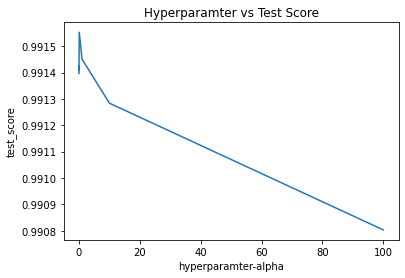

In [98]:
plt.plot(alpha, test_scores_bow)
plt.xlabel('hyperparamter-alpha')
plt.ylabel('test_score')
plt.title('Hyperparamter vs Test Score')
plt.show()

Train F1 score:  0.8868243243243245
Test F1 score:  0.8760200878844946
Train Accuracy:  0.9074705450778991
Test Accuracy:  0.8978007761966365


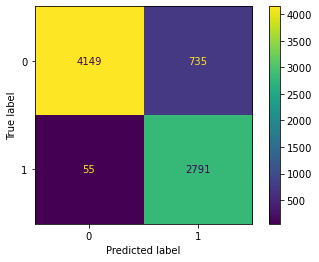

In [99]:
model = clf.best_estimator_.fit(train_data_1, y_train)
ytrain_pred = model.predict(train_data_1)
ytest_pred = model.predict(test_data_1)
print("Train F1 score: ", f1_score(y_train, ytrain_pred))
print("Test F1 score: ", f1_score(y_test, ytest_pred))
print("Train Accuracy: ", accuracy_score(y_train, ytrain_pred))
print("Test Accuracy: ", accuracy_score(y_test, ytest_pred))
plot_confusion_matrix(model, test_data_1, y_test)
plt.show()

### Naive Bayes + Tf-Idf 

In [100]:
params = {'alpha':[0.000001,0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
clf = GridSearchCV(estimator = MultinomialNB(), param_grid = params, scoring = 'roc_auc', cv = 5).fit(train_data_2, y_train)

In [101]:
clf.best_estimator_

MultinomialNB(alpha=1e-06)

In [102]:
test_scores_tfidf = list(clf.cv_results_['mean_test_score'])
alpha = [0.000001,0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

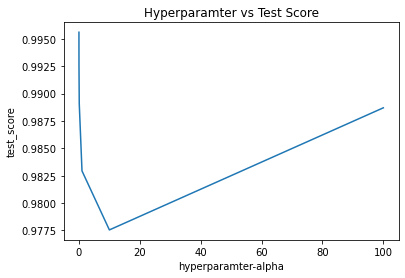

In [103]:
plt.plot(alpha, test_scores_tfidf)
plt.xlabel('hyperparamter-alpha')
plt.ylabel('test_score')
plt.title('Hyperparamter vs Test Score')
plt.show()

Train F1 score:  0.8929100529100529
Test F1 score:  0.8868878357030017
Train Accuracy:  0.9126494324802555
Test Accuracy:  0.9073738680465718


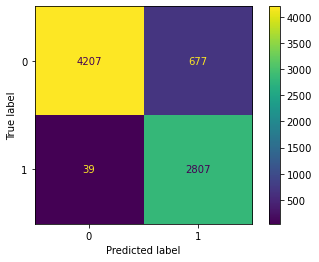

In [104]:
model = clf.best_estimator_.fit(train_data_2, y_train)
ytrain_pred = model.predict(train_data_2)
ytest_pred = model.predict(test_data_2)
print("Train F1 score: ", f1_score(y_train, ytrain_pred))
print("Test F1 score: ", f1_score(y_test, ytest_pred))
print("Train Accuracy: ", accuracy_score(y_train, ytrain_pred))
print("Test Accuracy: ", accuracy_score(y_test, ytest_pred))
plot_confusion_matrix(model, test_data_2, y_test)
plt.show()

### RandomForest + BoW 

In [109]:
params = {'n_estimators':[50, 100, 150, 200, 250, 300], 'max_depth':[10, 12, 14, 16]}
rf =  RandomForestClassifier()
clf = GridSearchCV(estimator = rf, param_grid = params, scoring = 'roc_auc', cv = 5).fit(train_data_1, y_train)

In [110]:
clf.best_estimator_

RandomForestClassifier(max_depth=16, n_estimators=300)

In [114]:
n_estimators = list(clf.cv_results_['param_n_estimators'])
max_depth = list(clf.cv_results_['param_max_depth'])
test_scores = list(clf.cv_results_['mean_test_score'])

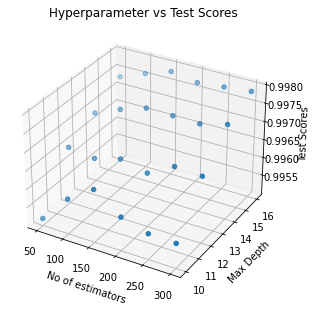

In [116]:
#reference: https://likegeeks.com/3d-plotting-in-python/
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(n_estimators, max_depth, test_scores)
ax.set_xlabel('No of estimators')
ax.set_ylabel('Max Depth')
ax.set_zlabel('Test Scores')
ax.set_title('Hyperparameter vs Test Scores')
plt.show()

Train F1 score:  0.9829437022900763
Test F1 score:  0.984121320249777
Train Accuracy:  0.9876569850243839
Test Accuracy:  0.9884864165588616


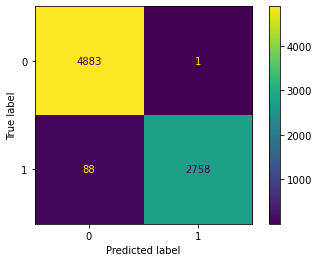

In [117]:
model = clf.best_estimator_.fit(train_data_1, y_train)
ytrain_pred = model.predict(train_data_1)
ytest_pred = model.predict(test_data_1)
print("Train F1 score: ", f1_score(y_train, ytrain_pred))
print("Test F1 score: ", f1_score(y_test, ytest_pred))
print("Train Accuracy: ", accuracy_score(y_train, ytrain_pred))
print("Test Accuracy: ", accuracy_score(y_test, ytest_pred))
plot_confusion_matrix(model, test_data_1, y_test)
plt.show()

### RandomForest + Tf-Idf 

In [118]:
params = {'n_estimators':[50, 100, 150, 200, 250, 300], 'max_depth':[2,4,6,8,10,12,14,16]}
rf =  RandomForestClassifier()
clf = GridSearchCV(estimator = rf, param_grid = params, scoring = 'roc_auc', cv = 5).fit(train_data_2, y_train)

In [119]:
clf.best_estimator_

RandomForestClassifier(max_depth=16, n_estimators=200)

In [120]:
n_estimators = list(clf.cv_results_['param_n_estimators'])
max_depth = list(clf.cv_results_['param_max_depth'])
test_scores = list(clf.cv_results_['mean_test_score'])

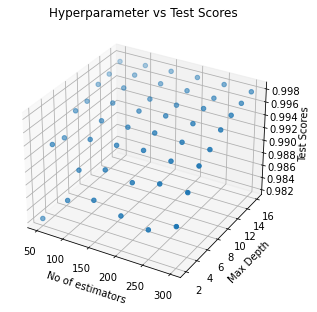

In [121]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(n_estimators, max_depth, test_scores)
ax.set_xlabel('No of estimators')
ax.set_ylabel('Max Depth')
ax.set_zlabel('Test Scores')
ax.set_title('Hyperparameter vs Test Scores')
plt.show()

Train F1 score:  0.9811816715454925
Test F1 score:  0.9815841230109065
Train Accuracy:  0.9864054205688144
Test Accuracy:  0.9866752910737386


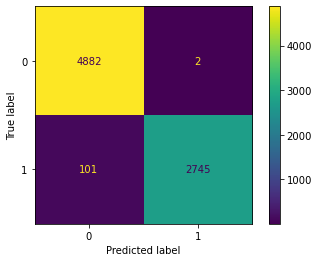

In [122]:
model = clf.best_estimator_.fit(train_data_2, y_train)
ytrain_pred = model.predict(train_data_2)
ytest_pred = model.predict(test_data_2)
print("Train F1 score: ", f1_score(y_train, ytrain_pred))
print("Test F1 score: ", f1_score(y_test, ytest_pred))
print("Train Accuracy: ", accuracy_score(y_train, ytrain_pred))
print("Test Accuracy: ", accuracy_score(y_test, ytest_pred))
plot_confusion_matrix(model, test_data_2, y_test)
plt.show()

### LGBM + BoW 

In [124]:
lgb = LGBMClassifier()
params = {'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1, 10], 'n_estimators': [50, 100, 150, 200, 250, 300],
         'max_depth': [2, 4, 6, 8, 10, 12]}

clf = GridSearchCV(estimator = lgb, param_grid = params, scoring = 'roc_auc', cv = 5).fit(train_data_1, y_train)

In [125]:
clf.best_estimator_

LGBMClassifier(max_depth=12)

In [126]:
clf.best_params_

{'learning_rate': 0.1, 'max_depth': 12, 'n_estimators': 100}

In [127]:
n_estimators = list(clf.cv_results_['param_n_estimators'])
max_depth = list(clf.cv_results_['param_max_depth'])
test_scores = list(clf.cv_results_['mean_test_score'])

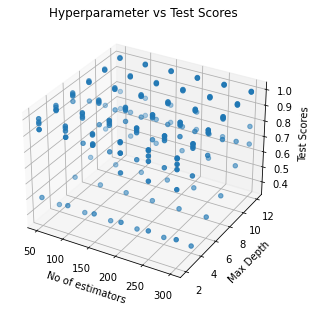

In [128]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(n_estimators, max_depth, test_scores)
ax.set_xlabel('No of estimators')
ax.set_ylabel('Max Depth')
ax.set_zlabel('Test Scores')
ax.set_title('Hyperparameter vs Test Scores')
plt.show()

Train F1 score:  0.9992370444274898
Test F1 score:  0.9963060686015832
Train Accuracy:  0.9994389538647447
Test Accuracy:  0.9972833117723157


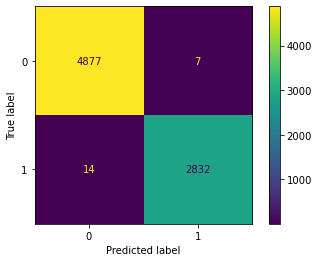

In [129]:
model = clf.best_estimator_.fit(train_data_1, y_train)
ytrain_pred = model.predict(train_data_1)
ytest_pred = model.predict(test_data_1)
print("Train F1 score: ", f1_score(y_train, ytrain_pred))
print("Test F1 score: ", f1_score(y_test, ytest_pred))
print("Train Accuracy: ", accuracy_score(y_train, ytrain_pred))
print("Test Accuracy: ", accuracy_score(y_test, ytest_pred))
plot_confusion_matrix(model, test_data_1, y_test)
plt.show()

### LGBM + Tf-Idf 

In [136]:
lgb = LGBMClassifier()
params = {'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1, 10], 'n_estimators': [50, 100, 150, 200, 250, 300],
         'max_depth': [2, 4, 6, 8, 10, 12]}

clf = GridSearchCV(estimator = lgb, param_grid = params, scoring = 'roc_auc', cv = 5).fit(train_data_2, y_train)

In [137]:
clf.best_estimator_

LGBMClassifier(max_depth=12)

In [138]:
clf.best_params_

{'learning_rate': 0.1, 'max_depth': 12, 'n_estimators': 100}

In [139]:
n_estimators = list(clf.cv_results_['param_n_estimators'])
max_depth = list(clf.cv_results_['param_max_depth'])
test_scores = list(clf.cv_results_['mean_test_score'])

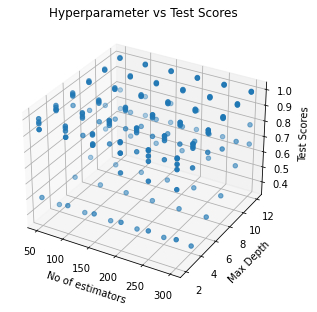

In [140]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(n_estimators, max_depth, test_scores)
ax.set_xlabel('No of estimators')
ax.set_ylabel('Max Depth')
ax.set_zlabel('Test Scores')
ax.set_title('Hyperparameter vs Test Scores')
plt.show()

Train F1 score:  0.9992370444274898
Test F1 score:  0.9963060686015832
Train Accuracy:  0.9994389538647447
Test Accuracy:  0.9972833117723157


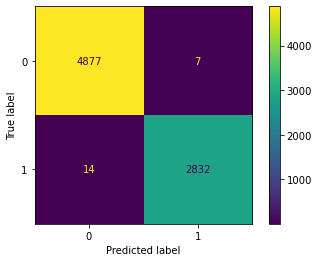

In [141]:
model = clf.best_estimator_.fit(train_data_2, y_train)
ytrain_pred = model.predict(train_data_2)
ytest_pred = model.predict(test_data_2)
print("Train F1 score: ", f1_score(y_train, ytrain_pred))
print("Test F1 score: ", f1_score(y_test, ytest_pred))
print("Train Accuracy: ", accuracy_score(y_train, ytrain_pred))
print("Test Accuracy: ", accuracy_score(y_test, ytest_pred))
plot_confusion_matrix(model, test_data_2, y_test)
plt.show()

### Summary: 

In [143]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ['Model', 'Vectorizer', 'Train F1_score', 'Test F1_score', 'Train Accuracy', 'Test Accuracy']
x.add_row(['Naive Bayes', 'BoW', 0.8868, 0.8760, 0.9074, 0.8978])
x.add_row(['Naive Bayes', 'TfIdf', 0.8929, 0.8868, 0.9126, 0.9073])
x.add_row(['Random Forest', 'BoW', 0.9829, 0.9841, 0.9876, 0.9884])
x.add_row(['Random Forest', 'TfIdf', 0.9811, 0.9815, 0.9864, 0.9866])
x.add_row(['LGBM', 'BoW', 0.9992, 0.9963, 0.9994, 0.9972])
x.add_row(['LGBM', 'TfIdf', 0.9992, 0.9963, 0.9994, 0.9972])
print(x)

+---------------+------------+----------------+---------------+----------------+---------------+
|     Model     | Vectorizer | Train F1_score | Test F1_score | Train Accuracy | Test Accuracy |
+---------------+------------+----------------+---------------+----------------+---------------+
|  Naive Bayes  |    BoW     |     0.8868     |     0.876     |     0.9074     |     0.8978    |
|  Naive Bayes  |   TfIdf    |     0.8929     |     0.8868    |     0.9126     |     0.9073    |
| Random Forest |    BoW     |     0.9829     |     0.9841    |     0.9876     |     0.9884    |
| Random Forest |   TfIdf    |     0.9811     |     0.9815    |     0.9864     |     0.9866    |
|      LGBM     |    BoW     |     0.9992     |     0.9963    |     0.9994     |     0.9972    |
|      LGBM     |   TfIdf    |     0.9992     |     0.9963    |     0.9994     |     0.9972    |
+---------------+------------+----------------+---------------+----------------+---------------+


LGBM had the best performance among all the models. It managed to most importantly reduce the no. of false negatives in comparison to Random Forest, which had similar values for accuracies and f1_scores but had relatively high no. of false negatives, which could be detrimental in the given problem. As high no. of false negatives would mean the system doesn't identify all potential injection attacks which would make the web application vulnerable to such attacks. 

LGBM performed the same for BoW and Tfidf features. So, any one of the two can be used. The method of vectorization won't make much difference when using LGBM for our dataset for the given problem statement.